In [1]:
# Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. Simulierte Daten erstellen
np.random.seed(42)
n_samples = 100
size = np.random.randint(50, 200, n_samples)  # Quadratmeter
rooms = np.random.randint(1, 6, n_samples)    # Anzahl der Zimmer
age = np.random.randint(0, 50, n_samples)     # Alter der Immobilie
price = size * 3000 + rooms * 50000 - age * 1000 + np.random.normal(0, 20000, n_samples)  # Preis

# Daten in ein DataFrame packen
data = pd.DataFrame({'size': size, 'rooms': rooms, 'age': age, 'price': price})

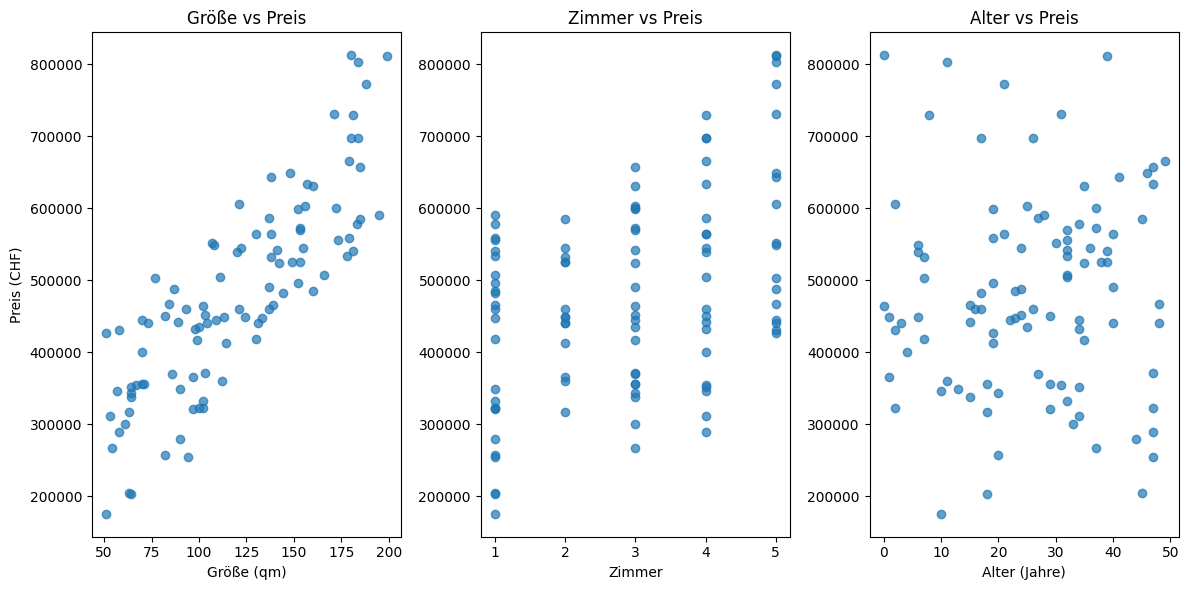

In [3]:
# 2. Daten visualisieren
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(data['size'], data['price'], alpha=0.7)
plt.title('Größe vs Preis')
plt.xlabel('Größe (qm)')
plt.ylabel('Preis (CHF)')

plt.subplot(1, 3, 2)
plt.scatter(data['rooms'], data['price'], alpha=0.7)
plt.title('Zimmer vs Preis')
plt.xlabel('Zimmer')

plt.subplot(1, 3, 3)
plt.scatter(data['age'], data['price'], alpha=0.7)
plt.title('Alter vs Preis')
plt.xlabel('Alter (Jahre)')
plt.tight_layout()
plt.show()

In [4]:
# 3. Modell erstellen
# Daten aufteilen
X = data[['size', 'rooms', 'age']]  # Merkmale
y = data['price']                  # Zielvariable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression trainieren
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# 4. Ergebnisse evaluieren
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mittlere quadratische Abweichung (MSE): {mse:.2f}")
print(f"Bestimmtheitsmaß (R²): {r2:.2f}")

Mittlere quadratische Abweichung (MSE): 332315405.26
Bestimmtheitsmaß (R²): 0.98


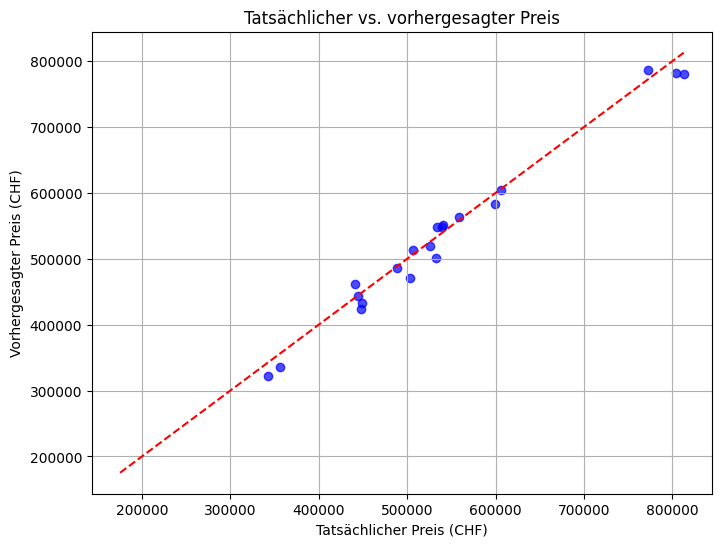

In [6]:
# 5. Vorhersagen visualisieren
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Tatsächlicher vs. vorhergesagter Preis')
plt.xlabel('Tatsächlicher Preis (CHF)')
plt.ylabel('Vorhergesagter Preis (CHF)')
plt.grid(True)
plt.show()

In [7]:
# 6. Modell für neue Daten verwenden
new_properties = pd.DataFrame({
    'size': [100, 150],
    'rooms': [3, 4],
    'age': [10, 20]
})
predicted_prices = model.predict(new_properties)
print("Vorhersagen für neue Immobilien:")
print(new_properties.assign(predicted_price=predicted_prices.round(2)))

Vorhersagen für neue Immobilien:
   size  rooms  age  predicted_price
0   100      3   10        436787.07
1   150      4   20        625256.25
